In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras # to build Neural Network

In [ ]:


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() # load dataset from  keras

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print shape of Data

X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape
     

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [ ]:
X_train[0] # image data in 2d numpy array shape 28x28 pixel
     

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0] #9 => Ankle boot

9

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

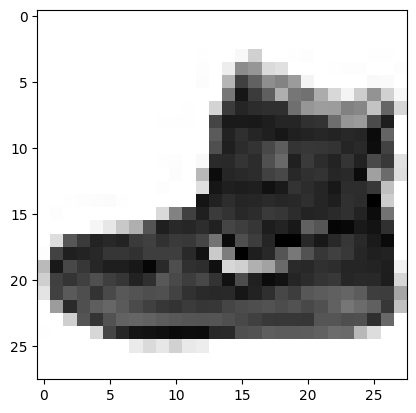

In [ ]:
# SHOW IMAGE
plt.imshow(X_train[0], cmap='Greys')

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  # plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))


NameError: ignored

In [ ]:
#CHANGE DIMENSION
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.ndim

3

In [ ]:
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# ref: https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
     

In [ ]:
X_train.ndim

4

In [ ]:
#FEATURE SCALING
X_train = X_train/255
X_test = X_test/255
     

In [ ]:
#SPLIT DATASET
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [ ]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [ ]:
#BUILOD CONVOLUTIONAL NEURAL NETWORK

#Building CNN model
cnn_model = keras.models.Sequential([
                         tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                         tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                         tf.keras.layers.Flatten(),
                         tf.keras.layers.Dense(units=128, activation='relu'),
                         tf.keras.layers.Dropout(0.25),
                         tf.keras.layers.Dense(units=256, activation='relu'),
                         tf.keras.layers.Dropout(0.25),
                         tf.keras.layers.Dense(units=128, activation='relu'),
                         tf.keras.layers.Dense(units=10, activation='softmax')
                         ])

In [ ]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_validation, y_validation))
  

Epoch 1/20
3000/3000 [==============================] - 52s 16ms/step - loss: 0.5596 - accuracy: 0.7919 - val_loss: 0.3890 - val_accuracy: 0.8577
Epoch 2/20
3000/3000 [==============================] - 64s 21ms/step - loss: 0.3653 - accuracy: 0.8666 - val_loss: 0.3340 - val_accuracy: 0.8780
Epoch 3/20
3000/3000 [==============================] - 58s 19ms/step - loss: 0.3182 - accuracy: 0.8832 - val_loss: 0.3093 - val_accuracy: 0.8844
Epoch 4/20
3000/3000 [==============================] - 50s 17ms/step - loss: 0.2895 - accuracy: 0.8939 - val_loss: 0.2916 - val_accuracy: 0.8907
Epoch 5/20
3000/3000 [==============================] - 46s 15ms/step - loss: 0.2718 - accuracy: 0.8986 - val_loss: 0.2777 - val_accuracy: 0.8997
Epoch 6/20
3000/3000 [==============================] - 49s 16ms/step - loss: 0.2570 - accuracy: 0.9061 - val_loss: 0.2726 - val_accuracy: 0.9057
Epoch 7/20
3000/3000 [==============================] - 50s 17ms/step - loss: 0.2423 - accuracy: 0.9111 - val_loss: 0.2703 -

In [ ]:
#TEST THE MODEL

y_pred = cnn_model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [ ]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3109 - accuracy: 0.8969


[0.31093451380729675, 0.8968999981880188]

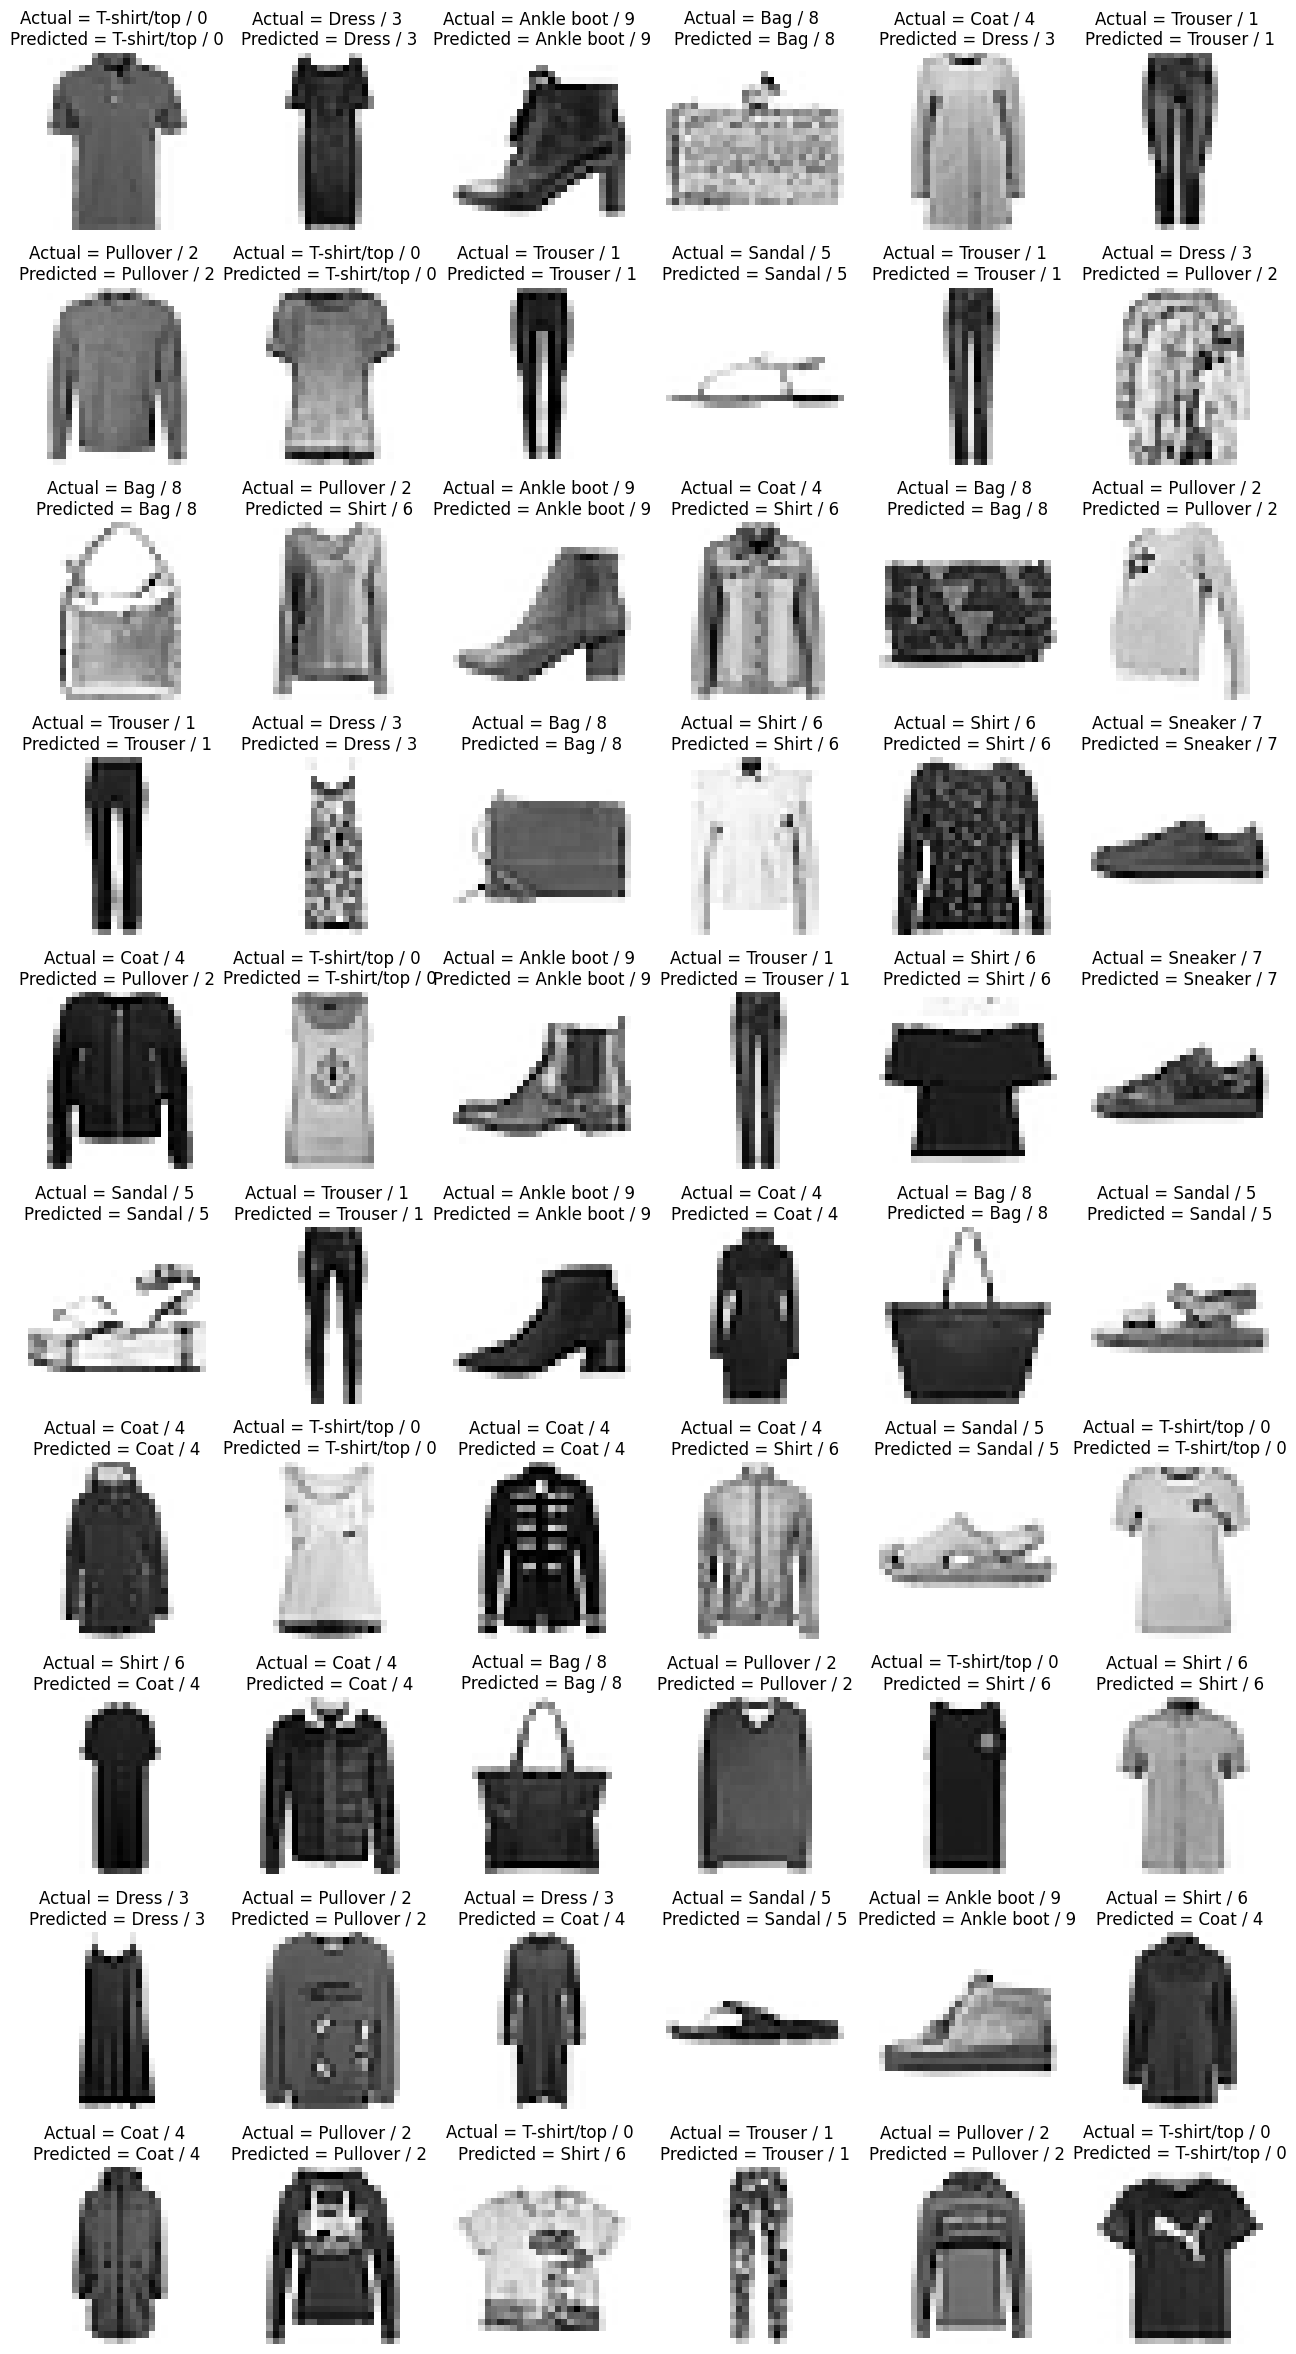

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j)
  j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

<Axes: >

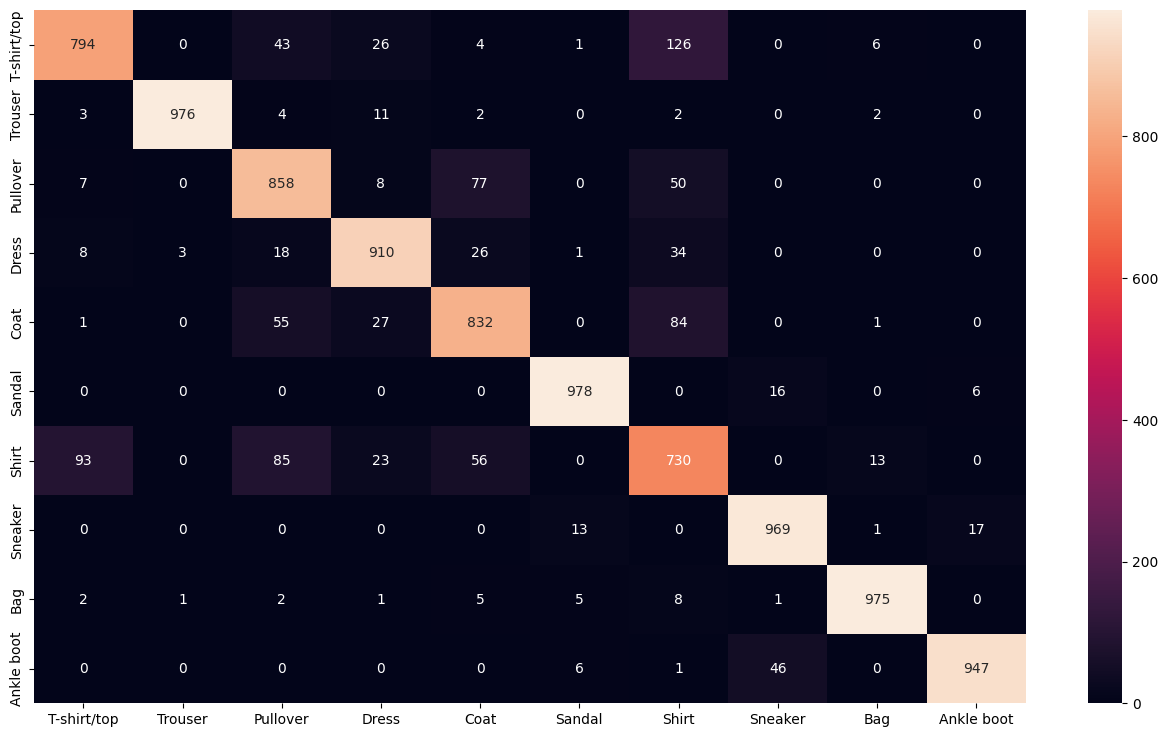

In [ ]:
# EVALUATE THE MODEL

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
     

In [ ]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.79      0.83      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.81      0.86      0.83      1000
       Dress       0.90      0.91      0.91      1000
        Coat       0.83      0.83      0.83      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.71      0.73      0.72      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
# Save model
cnn_model.save('fashion_mnist_cnn_model.h5')

In [ ]:
# Load model
fashion_mnist_cnn_model = tf.keras.models.load_model('fashion_mnist_cnn_model.h5')

In [ ]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
np.argmax(Y_pred_sample[0])

1/1 [==============================] - 0s 107ms/step


9

In [ ]:
y_test[0]

9